## 기계학습 중간 대체 과제
---
목표 : Python과 scikit-learn을 사용하여 클러스터링 분석을 수행하여 데이터에 숨겨진 그룹을 발견합니다.

##### 문제 정의: 서울시에서 안심이 CCTV가 많이 설치된 지역을 찾아서, 심야 시간에 혼자 걸어도 안심하고 귀가할 수 있는 지역구 찾기
- 유동인구가 많은 지역일수록 안심이 CCTV가 많이 설치되어 있을 것 같기 때문에 강남구에 안심이 CCTV가 가장 많이 설치되어 있을 것이라고 예측된다.
##### 데이터 선택: 서울특별시_자치구단위 서울생활인구 일별 집계표 + 서울특별시_(안심이) CCTV 설치 현황
- 1번째 데이터 : https://www.data.go.kr/data/15083611/fileData.do
- 2번째 데이터 : https://www.data.go.kr/data/15081885/fileData.do

### 1. 환경 설정

In [19]:
# Seaborn 패키지 설치
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 설정
import matplotlib.font_manager as fm
font_path = './font/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 현재 작업 경로 확인
current_directory = os.getcwd()
print(current_directory)

/workspaces/ml202401-midterm-taehyunkim32


### 2. CSV에서 데이터 불러오기

In [21]:
# 서울시 안심이 CCTV 연계 현황 데이터 불러오기
cctv_df = pd.read_csv("./Data/서울시 안심이 CCTV 연계 현황.csv", encoding='cp949')

# 읽어온 데이터 프레임 확인
print("========== 서울특별시 안심이 CCTV 연계 현황 ==========")
print(cctv_df)

========== 서울특별시 안심이 CCTV 연계 현황 ==========
       자치구                             안심 주소       위도        경도  CCTV 수량  \
0      중랑구  중화2동 325-103 (공원 입구)_C-JH02-0035  37.5958  127.0709        1   
1      중랑구       신내1동 819(고정2)_C-SN01-0029-B  37.6135  127.1113        1   
2      중랑구   중화2동 325-103(고정1)_C-JH02-0035-A  37.5958  127.0709        1   
3      중랑구       신내1동 819(고정1)_C-SN01-0029-A  37.6135  127.1113        1   
4      중랑구   중화2동 325-103(고정2)_C-JH02-0035-B  37.5958  127.0709        1   
...    ...                               ...      ...       ...      ...   
83729  강남구                        대치2-256-02  37.5059  127.0589        1   
83730  강남구                         수서-208-01  37.4902  127.1014        1   
83731  강남구                         수서-208-02  37.4902  127.1014        1   
83732  강남구                        대치2-256-03  37.5059  127.0589        1   
83733  강남구                         수서-208-03  37.4902  127.1014        1   

            수정 일시  
0      2022-12-01  
1   

In [22]:
# 자치구단위 서울생활인구 일별 집계표 데이터 불러오기
pop_df = pd.read_csv("./Data/자치구단위 서울생활인구 일별 집계표.csv", encoding='cp949')

# 읽어온 데이터 프레임 확인
print("========== 자치구단위 서울생활인구 현황 ==========")
print(pop_df)

========== 자치구단위 서울생활인구 현황 ==========
          기준일ID  시군구코드 시군구명        총생활인구수      내국인생활인구수   장기체류외국인인구수  \
0      20240421  11000  서울시  1.048440e+07  9.937015e+06  387083.4422   
1      20240421  11110  종로구  2.687531e+05  2.356983e+05   17095.3463   
2      20240421  11140   중구  2.520925e+05  1.942265e+05   17807.3403   
3      20240421  11170  용산구  2.927820e+05  2.666552e+05   15877.1674   
4      20240421  11200  성동구  3.400600e+05  3.224420e+05   15060.6535   
...         ...    ...  ...           ...           ...          ...   
57091  20180405  11620  관악구  5.272641e+05  5.036422e+05   22109.7135   
57092  20180405  11650  서초구  6.570409e+05  6.366557e+05   14811.8716   
57093  20180405  11680  강남구  9.128639e+05  8.713715e+05   22101.3558   
57094  20180405  11710  송파구  7.733757e+05  7.531781e+05   14761.5934   
57095  20180405  11740  강동구  4.893388e+05  4.783264e+05    9807.4046   

        단기체류외국인인구수        일최대인구수        일최소인구수  주간인구수(09~18)  야간인구수(19~08)  \
0      160301.3292 

### 3. 데이터 전처리
#### 3-1. 결측치 확인

In [23]:
# 데이터 프레임에서 NaN 값 개수 확인
nan_values1 = cctv_df.isna().sum()
print(nan_values1)

nan_values2 = pop_df.isna().sum()
print(nan_values2)

자치구        0
안심 주소      0
위도         0
경도         0
CCTV 수량    0
수정 일시      0
dtype: int64
기준일ID             0
시군구코드             0
시군구명              0
총생활인구수            0
내국인생활인구수          0
장기체류외국인인구수        0
단기체류외국인인구수        0
일최대인구수            0
일최소인구수            0
주간인구수(09~18)      0
야간인구수(19~08)      0
일최대이동인구수          0
서울외유입인구수          0
동일자치구행정동간이동인구수    0
자치구간이동인구수         0
dtype: int64


#### 3-2. 자치구별 안심이_CCTV수 카운트

데이터프레임의 열에 대한 설명:
- 자치구: 서울특별시의 자치구
- 안심이_CCTV: 해당 자치구에 설치된 안심이 CCTV의 개수
- 생활인구수: 해당 자치구의 생활 인구 수

In [24]:
# 자치구별 안심이_CCTV 개수 카운트
cctv_counts = cctv_df.groupby('자치구').size().reset_index(name='안심이_CCTV수')

# 데이터프레임으로 변환
cctv_counts_df = pd.DataFrame(cctv_counts)

print(cctv_counts_df)

     자치구  안심이_CCTV수
0    강남구       7007
1    강동구       3191
2    강북구       2858
3    강서구       3210
4    관악구       5366
5    광진구       4091
6    구로구       4050
7    금천구       2725
8    노원구       2655
9    도봉구       1598
10  동대문구       2857
11   동작구       2650
12   마포구       2450
13  서대문구       3223
14   서초구       5060
15   성동구       4036
16   성북구       3943
17   송파구       3094
18   양천구       3845
19  영등포구       2899
20   용산구       1078
21   은평구       4111
22   종로구       1930
23    중구       2336
24   중랑구       3471


#### 3-3. k-means 클러스터링에서 사용할 특성 추출

In [25]:
# 최근일기준으로 서울생활인구 설정
filtered_df = pop_df[pop_df['기준일ID'] == 20240421]

# 서울시 전체를 제외한 자치구의 데이터로 설정
filtered_df = filtered_df[filtered_df['시군구명'] != '서울시']

# 총생활인구수 열만 추출
filtered_df = filtered_df[['시군구명', '총생활인구수']]

# '시군구명'열을 '자치구'로 통일
pop_counts_df = filtered_df.rename(columns={'시군구명': '자치구'})

# 총생활인구수의 소수점 삭제
pop_counts_df['총생활인구수'] = pop_counts_df['총생활인구수'].round().astype(int)

print(pop_counts_df)

     자치구  총생활인구수
1    종로구  268753
2     중구  252092
3    용산구  292782
4    성동구  340060
5    광진구  389777
6   동대문구  369899
7    중랑구  355970
8    성북구  441873
9    강북구  287656
10   도봉구  270435
11   노원구  494858
12   은평구  442641
13  서대문구  370302
14   마포구  468916
15   양천구  381326
16   강서구  543343
17   구로구  421001
18   금천구  214854
19  영등포구  486396
20   동작구  395166
21   관악구  491101
22   서초구  517923
23   강남구  730918
24   송파구  736835
25   강동구  519524


#### 3-4. 데이터 병합

In [26]:
# 자치구를 기준으로 안심이_CCTV수 데이터프레임과 총생활인구수 데이터프레임을 병합
merged_df = pd.merge(cctv_counts_df, pop_counts_df, on='자치구')

print(merged_df)

     자치구  안심이_CCTV수  총생활인구수
0    강남구       7007  730918
1    강동구       3191  519524
2    강북구       2858  287656
3    강서구       3210  543343
4    관악구       5366  491101
5    광진구       4091  389777
6    구로구       4050  421001
7    금천구       2725  214854
8    노원구       2655  494858
9    도봉구       1598  270435
10  동대문구       2857  369899
11   동작구       2650  395166
12   마포구       2450  468916
13  서대문구       3223  370302
14   서초구       5060  517923
15   성동구       4036  340060
16   성북구       3943  441873
17   송파구       3094  736835
18   양천구       3845  381326
19  영등포구       2899  486396
20   용산구       1078  292782
21   은평구       4111  442641
22   종로구       1930  268753
23    중구       2336  252092
24   중랑구       3471  355970


### 4. k-means 클러스터링
#### 4-1. 라벨 인코딩을 통해 범주형 데이터를 숫자형 데이터로 변환

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = merged_df[['자치구', '안심이_CCTV수', '총생활인구수']]

# 자치구를 라벨 인코딩으로 변환
le = LabelEncoder()
X['자치구'] = le.fit_transform(X['자치구'])

#### 4-2. Elbow 기법을 통해 최적의 클러스터 수 결정
클러스터의 응집성이 급격히 떨어지는 구간은 nclusters = 3

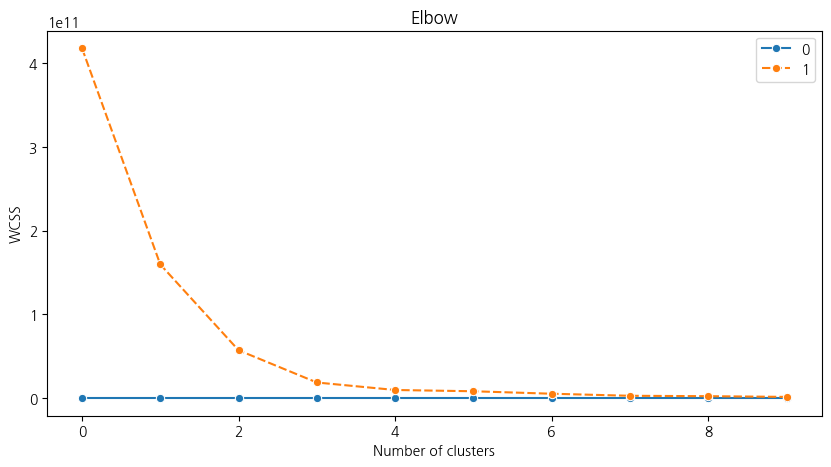

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 4-3. 클러스터링 진행후 실루엣 점수를 통해 클러스터링 결과 파악

In [29]:
# KMeans 클러스터링 알고리즘
from sklearn.cluster import KMeans

# 클러스터 수와 랜덤 시드 설정
nclusters = 3 
seed = 0

# KMeans 모델 생성 및 훈련
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# 각 데이터 점에 대한 클러스터 예측
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       0, 0, 0], dtype=int32)

#### 4-4. 실루엣 점수를 통해 클러스터링 결과 파악
실루엣 점수는 -1에서 1사이의 값을 가지며, 1에 가까울수록 좋은 클러스터링의 결과를 가지고 있다고 판단된다.

In [30]:
from sklearn import metrics

# Silhouette Score 계산
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6140789925001755


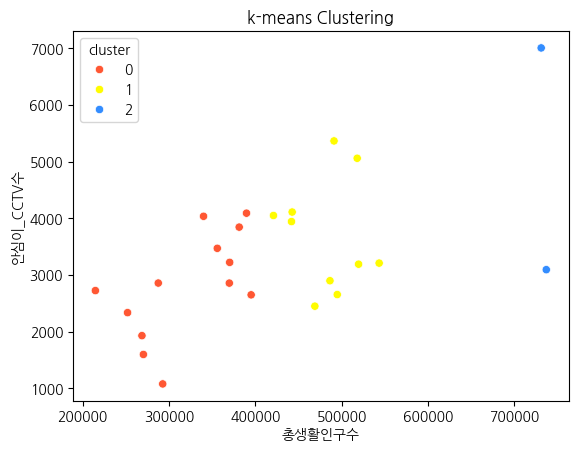

In [31]:
# 클러스터 레이블 추출
labels = y_cluster_kmeans

# 클러스터 레이블을 데이터프레임에 추가
X["cluster"] = labels

# Scatter plot
sns.scatterplot(x="총생활인구수", y="안심이_CCTV수", data=X, hue="cluster", palette=["#FF5733", "#FFFC00", "#338DFF"])

# x축, y축, title 라벨 설
plt.title('k-means Clustering')
plt.xlabel("총생활인구수")
plt.ylabel("안심이_CCTV수")

plt.show()

실루엣 점수를 확인해보면 0.61 정도로 상당히 높은 것을 확인할 수 있습니다.

군집화의 경우 3개의 그룹으로 생성되었으며, 군집별 특징은 다음과 같습니다.

- 빨간색(0): 총 생활 인구가 적고, 안심이 CCTV가 적은 자치구
- 노랑색(1): 총 생활 인구가 많지 않고, 안심이 CCTV가 많지 않은 자치구
- 파랑색(2): 총 생활 인구가 많고, 안심이 CCTV가 많은 자치구


### 5. 결과 분석
#### 5-1. 총생활인구수가 많은 자치구 확인

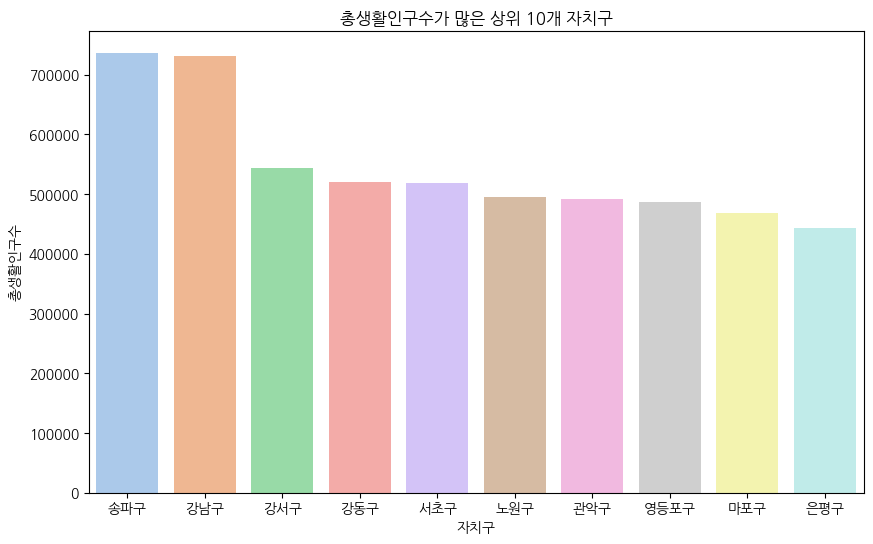

In [32]:
# 총생활인구수가 많은 상위 10개 자치구 선택
top_10 = merged_df.nlargest(10, '총생활인구수')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='총생활인구수', data=top_10, palette='pastel')

# 그래프 제목과 축 이름 설정
plt.title('총생활인구수가 많은 상위 10개 자치구')
plt.xlabel('자치구')
plt.ylabel('총생활인구수')

plt.show()

#### 5-2. 안심이_CCTV수가 많은 자치구 확인

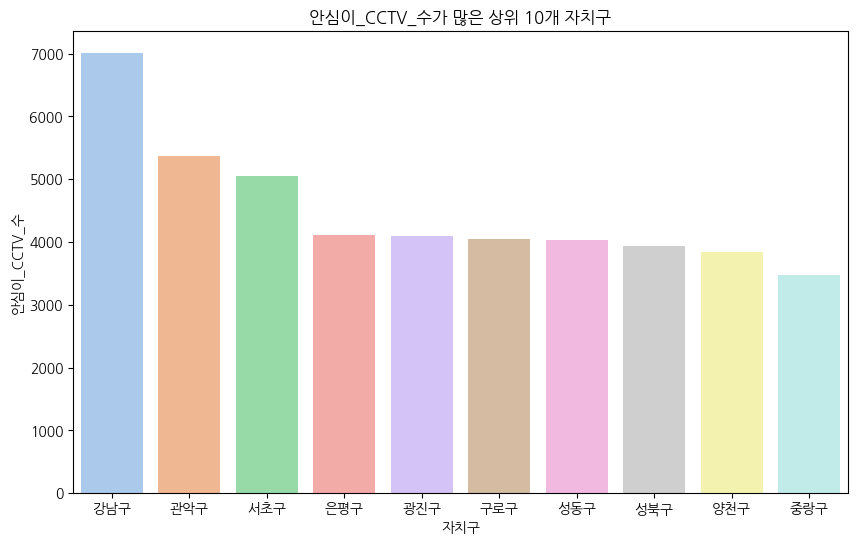

In [33]:
# 안심이_CCTV_수가 많은 상위 10개 자치구 선택
top_10 = merged_df.nlargest(10, '안심이_CCTV수')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='안심이_CCTV수', data=top_10, palette='pastel')

# 그래프 제목과 축 이름 설정
plt.title('안심이_CCTV_수가 많은 상위 10개 자치구')
plt.xlabel('자치구')
plt.ylabel('안심이_CCTV_수')

plt.show()

**결론 도출** : 서울특별시 자치구를 클러스터링하여 분석한 결과, 총 생활 인구 수가 많은 지역구일수록 안심이 CCTV의 수가 많은 경향을 확인할 수 있었습니다. 
인구가 많을수록 CCTV가 많다는 결론은 도시 안전에 대한 정책과 시설 설치에 관한 중요한 기준이 될 수 있습니다. 이러한 데이터를 바탕으로 도심의 안전을 높일 수 있는 방법을 찾아가는데 도움을 얻을 수 있을 것입니다.

**중간 과제를 진행하고 느낀점** : k-means 클러스터링을 이용해서 결과가 명확히 보이는 주제를 찾는 것은 매우 힘들다는 것을 느꼈습니다. 실루엣 점수가 높게 나오는 데이터를 찾기 위해 주제를 여러 번 변경하고 코드도 축소되었지만 여러 시행착오들 때문에 파이썬과 k-means 클러스터링 사용법에 익히는데 큰 도움이 되었습니다. 더불어, 군집화 과정에서 추가적인 속성을 고려한다면 더 나은 결과를 얻을 수 있을 것으로 예상됩니다. 예를 들어, 자치구의 인구 밀도나 지역구의 면적 등을 고려한다면 보다 정확한 군집화가 가능할 것이라고 생각합니다.